In [280]:
%autoreload 2

UsageError: Line magic function `%autoreload` not found.


In [1]:
# imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('fivethirtyeight')
import math
import seaborn as sns
from datetime import datetime

In [19]:
df = pd.read_excel('Data/Time Series Data.xlsx', index_col = 'Day')
df = df

In [220]:
# moving average strategy
# ma function

def rolling_averages_inflexions(data, window): 
    # generating simple moving average
    
    # data - is the series to generate signals for
    # window - is the window used to generate the average
    # lag - is how far % past the average before a signal is generated
    
    SMA = data.rolling(window = window).mean()
    gradients = pd.Series(np.gradient(SMA))
    second_gradients = pd.Series(np.gradient(gradients))
    # generating signals
    sigPriceBuy = []
    sigPriceSell = []
      
    #flag = 1: long position, flag = 0: short position, flag = -1: no position
    flag = -1
    
    flag_status = []
    
    daily_profit = []
    cumulative_profit = []
    daily_close_price = data[i]
    
    
    for i in range(len(data)):
        flag_status.append(flag)
        
        if i == len(data)-1:
            
            if flag == 1:
                
                #from long to no position
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[i])
                flag = -1
                daily_profit.append(data[i])
                
            elif:
                #from short to nothing
                flag == 0:
                sigPriceBuy.append(data[i])
                sigPriceSell.append(np.nan)
                flag = -1
                daily_profit.append(data[i])
                
        elif gradients[i]>0 and gradients[i-1]<0:
            
            if flag != 1:
                #from nothing or short to long
                sigPriceBuy.append(data[i])
                sigPriceSell.append(np.nan)
                flag = 1
                price_bought_at = data[i]
                
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
                
        elif gradients[i]<0 and gradients[i-1]>0:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else: 
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy, sigPriceSell, flag_status)
    

SyntaxError: invalid syntax (3241433976.py, line 41)

To implement below:
- range of possible windows to be used
- second gradients and additional purchases of security. 
- remove need for final offload

In [233]:
def rolling_averages_inflexions_comp(data, window): 
    # generating simple moving average
    
    # data - is the series to generate signals for
    # window - is the window used to generate the average
    # lag - is how far % past the average before a signal is generated
    
    SMA = data.rolling(window = window).mean()
    #gradients_prov = np.gradient(SMA)
    gradients_prov = pd.DataFrame.pct_change(SMA)
    #gradients_prov = np.insert(gradients_prov,0,np.nan)
    #gradients_prov = gradients_prov[:-1].copy()
    
    gradients = pd.Series(gradients_prov).fillna(0)
    second_gradients = pd.Series(np.gradient(gradients))
    # generating signals
    sigPriceBuy = []
    sigPriceSell = []
      
    #flag = 1: long position, flag = -1: short position, flag = 0: no position
    
    #initial position is nothing
    flag = 0
    
    flag_status = []
    position = []
    daily_profit = []
    daily_close_price = data
    profit = 0
    trade_base = 100000 #100,000
    
###########BASE PROFIT OVERALL   
    for i in range(len(data)):
        
        flag_status.append(flag)

        if gradients[i]>0 and gradients[i-1]<=0:

            #From nothing to long
            if flag == 0:
                price_bought_at = data[i]
                flag = 1
                sigPriceBuy.append('BUY')
                sigPriceSell.append(0)                    

            #From short to a long
            elif flag == -1:
                profit += price_short_at - data[i]
                price_bought_at = data[i]
                flag = 1
                sigPriceBuy.append('BUY')
                sigPriceSell.append(0)

            #from long to long - NO CHANGE
            elif flag == 1:
                sigPriceBuy.append(0)
                sigPriceSell.append(0)

                pass

        # TAKING A SHORT POSITION    
        elif gradients[i]<0 and gradients[i-1]>=0:

            #from nothing to a short
            if flag == 0:
                price_short_at = data[i]
                flag = -1
                sigPriceBuy.append(0)
                sigPriceSell.append('SELL') 

            #from short to short - NO CHANGE
            elif flag == -1:
                sigPriceBuy.append(0)
                sigPriceSell.append(0)
                pass

            #from long to a short 
            elif flag == 1:
                profit += data[i] - price_bought_at 
                price_short_at = data[i]
                flag = -1
                sigPriceBuy.append(0)
                sigPriceSell.append('SELL')
        else:
            sigPriceBuy.append(0)
            sigPriceSell.append(0)


########DAILY PROFIT
    current_position = 0
    for i in range(0,len(data)):
        
        if flag_status[i]==0:
            daily_profit.append(0)
            position.append(0)

        if flag_status[i]==1:
            daily_profit.append(data[i]-data[i-1])
            position.append(trade_base)
            
        if flag_status[i]==-1:
            daily_profit.append(data[i-1]-data[i])
            position.append(-trade_base)
            
########CUMULATIVE PROFIT            
    cumulative_profit = np.cumsum(daily_profit)
    
########CONCATENATE
    
    #print(len(sigPriceBuy))
    #print(len(sigPriceSell))
    #print(len(flag_status))
    #print(len(daily_profit))
    #print(len(cumulative_profit))
    
    table = pd.DataFrame({
        'PRICE':data,
        'GRADIENTS':gradients,
        'SECOND_GRADIENTS':second_gradients,
        'SMA':SMA,
        'BUY_SIGNALS':sigPriceBuy,
        'SELL_SIGNALS':sigPriceSell,
        'POSITION':flag_status,
        'DAILY PROFIT':daily_profit,
        'CUMULATIVE PROFIT':cumulative_profit
    })
    
    

########RETURN

    return table, (sigPriceBuy, sigPriceSell, flag_status, daily_profit, cumulative_profit, profit)

In [234]:
table, data_tuple = rolling_averages_inflexions_comp(df['Series 1'],1)
data_tuple[5]
print(data_tuple[5])
#plt.figure(figsize=(10,10))
table.tail(10)

660.7256534247421


,PRICE,GRADIENTS,SECOND_GRADIENTS,SMA,BUY_SIGNALS,SELL_SIGNALS,POSITION,DAILY PROFIT,CUMULATIVE PROFIT
2597,1051.603722,-0.002389,-0.000482,1051.603722,0,SELL,1,-2.518822,665.763298
2598,1052.656546,0.001001,0.000159,1052.656546,BUY,0,-1,-1.052825,664.710473
2599,1050.475914,-0.002072,0.007659,1050.475914,0,SELL,1,-2.180633,662.529840
2600,1067.617984,0.016318,0.001511,1067.617984,BUY,0,-1,-17.142070,645.387770
2601,1068.632552,0.000950,-0.008159,1068.632552,0,0,1,1.014568,646.402338
2602,1068.632552,0.000000,0.009445,1068.632552,0,0,1,0.000000,646.402338
2603,1089.834425,0.019840,-0.000190,1089.834425,0,0,1,21.201873,667.604211
2604,1089.421252,-0.000379,-0.006953,1089.421252,0,SELL,1,-0.413173,667.191039
2605,1095.886638,0.005935,0.003843,1095.886638,BUY,0,-1,-6.465385,660.725653
2606,1103.894534,0.007307,0.001373,1103.894534,0,0,1,8.007896,668.733550


the profit of series1 is 393.5223725286172
the profit of series2 is -3.114264376400115
the profit of series3 is 90.7642360976917
the profit of series4 is -60.27866230135541
the profit of series5 is 234.62817580072897
the profit of series6 is 62.80694421638722
the profit of series7 is 62.55794923916139
the profit of series8 is 215.6278052064648
the profit of series9 is 9.366638825578463
the profit of series10 is -82.28848114169263
the profit of series11 is -205.6775033450272
the profit of series12 is -268.87889582227933
the profit of series13 is 2156.4345549738196
the profit of series14 is 569.2882042585281
the profit of series15 is -21.111527547251626
the profit of series16 is -88.72280069576561
the profit of series17 is -56.565599179934026
the profit of series18 is -31.51614213773516
the profit of series19 is 52.38621028094765
the profit of series20 is -163.63336085879422
the profit of series21 is 67.71836865767511
the profit of series22 is -12.44640255325099
the profit of series23 is

<AxesSubplot:xlabel='Day'>

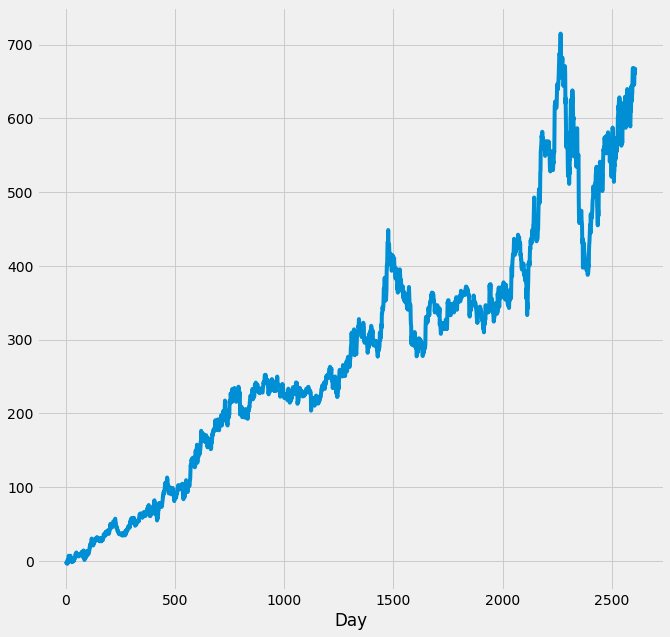

In [223]:
def profitno(series, window):
        table, data_tuple = rolling_averages_inflexions(df['Series {}'.format(series)],window)
        print('the profit of series{} is {}'.format(series, data_tuple[5]))

for i in range(1,29):
    profitno(i,15)

print(data_tuple[5])
plt.figure(figsize=(10,10))
table['CUMULATIVE PROFIT'].plot()

In [232]:
data = pd.read_excel('Data/Test Bed.xlsx', index_col='Day')
data

,Market Price,Trade,Position,PnL Calc,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
Day,,,,,,,,
0.0,100.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1.0,99.976347,0.0,0.0,0.000000,NaN,NaN,Profit:,399558.781171
2.0,100.147087,0.0,0.0,0.000000,NaN,NaN,NaN,NaN
3.0,100.077292,0.0,0.0,0.000000,NaN,NaN,NaN,NaN
4.0,100.048834,0.0,0.0,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
497.0,109.117316,0.0,75000.0,0.000000,NaN,NaN,NaN,NaN
498.0,109.047841,0.0,75000.0,0.000000,NaN,NaN,NaN,NaN
499.0,109.117825,0.0,75000.0,0.000000,NaN,NaN,NaN,NaN


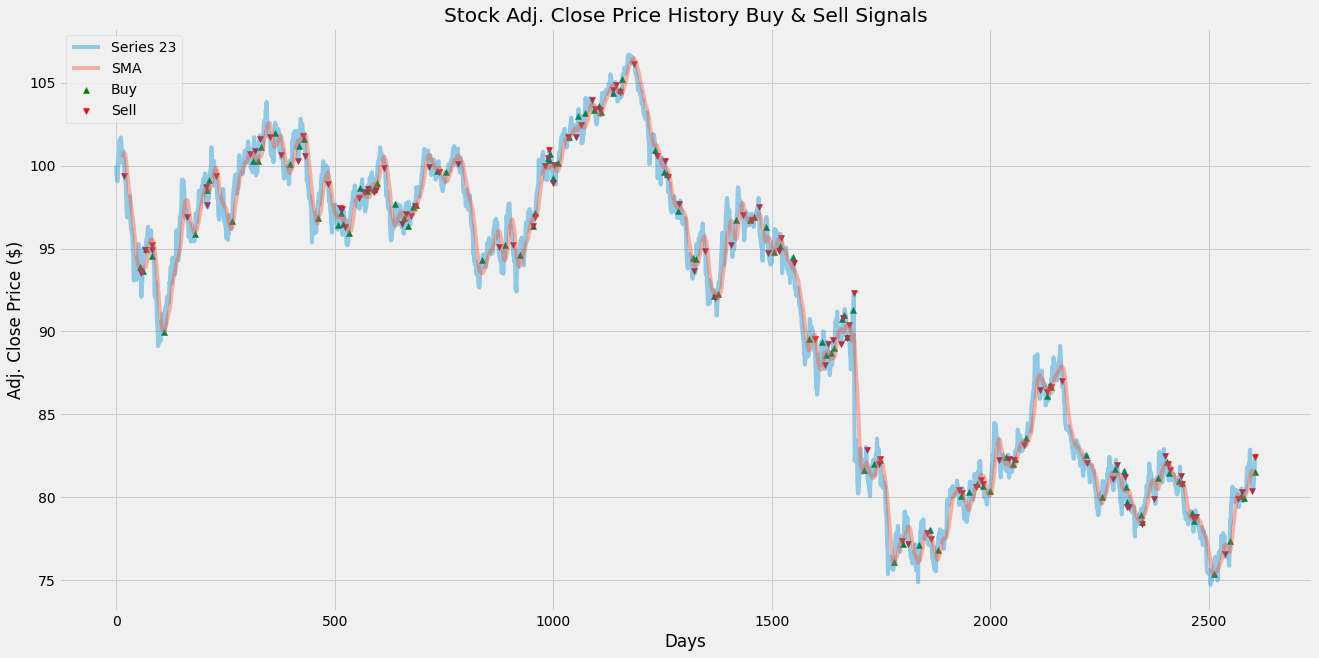

In [39]:
window_test =15
series = 'Series 23'
# =========================================

#Store the buy and sell data into a variable
buy_sell_data_test = rolling_averages_inflexions(df[series], window_test)

# visualise test
plt.figure(figsize=(20, 10))
plt.plot(df[series], label=series, alpha=0.4)
plt.plot(df[series].rolling(window=window_test).mean(), label='SMA', alpha=0.4)
plt.scatter(df.index, buy_sell_data_test[0], label='Buy', marker='^', color='green')
plt.scatter(df.index, buy_sell_data_test[1], label='Sell', marker='v', color='red')
plt.title('Stock Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Days')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [22]:
def Backtest(data, buy_sell):
    
    profit = np.nansum(buy_sell[1]) - np.nansum(buy_sell[0])
    data_profit = data.iloc[-1] - data[0]
    rel_profit = profit - data_profit
    
    return rel_profit


In [26]:
def Backtest_2(data, buy_sell_data):
    
    profit = 0
    
    for i in range(1,len(buy_sell_data[2])): 

        if buy_sell_data[2][i]==buy_sell_data[2][i-1]:
            #no change
            pass

        elif buy_sell_data[2][i] == 1 and buy_sell_data[2][i-1]==-1:
            #from nothing to long
            price_bought_at = data[i]
            
        
        elif buy_sell_data[2][i] == 0 and buy_sell_data[2][i-1]==-1:
            #from nothing to short
            price_shorted_at = data[i]
            

        elif buy_sell_data[2][i] == 0 and buy_sell_data[2][i-1]==1:
            #from long to short
            profit += df[series][i] - price_bought_at
            price_shorted_at = data[i]

        elif buy_sell_data[2][i] == 1 and buy_sell_data[2][i-1]==0:
            #from short to long
            profit += price_shorted_at - df[series][i]  
            price_bought_at = data[i]   

        elif buy_sell_data[2][i] == -1 and buy_sell_data[2][i-1]==0:
            #from short to nothing
            profit += price_shorted_at - df[series][i]   
            
        elif buy_sell_data[2][i] == -1 and buy_sell_data[2][i-1]==1:
            #from long to nothing
            profit += df[series][i]  - price_bought_at
            
    return profit  

In [32]:
def profit_fct_inflection_points():
    
    """
    parameters that can be modified 
    """
    
    assets = list(df.columns)
    window = 30
    profit = {}
    
    for i in assets:
        profit_on_series = Backtest_2(df[i], rolling_averages_inflexions(df[i], window))
        profit[i]=profit_on_series

    return profit

In [33]:
profit_inflexion = profit_fct_inflection_points()
profit_inflexion

{'Series 1': 440.39420436625693,
 'Series 2': 723.1021052872904,
 'Series 3': 14.56265839356233,
 'Series 4': 184.77156527816993,
 'Series 5': -93.90248854288734,
 'Series 6': 64.06230472151098,
 'Series 7': -41.77683474299158,
 'Series 8': -263.780218489321,
 'Series 9': 227.60086669029658,
 'Series 10': -16.92140509719293,
 'Series 11': -26.508980502730736,
 'Series 12': 134.37437212250308,
 'Series 13': 2916.530765670033,
 'Series 14': 602.4768830634312,
 'Series 15': 28.986607862827555,
 'Series 16': 85.83531491708224,
 'Series 17': -47.94313553371016,
 'Series 18': -40.490558007026024,
 'Series 19': -62.27272767053594,
 'Series 20': 36.15572574216091,
 'Series 21': 19.616394282018774,
 'Series 22': -16.49376798081471,
 'Series 23': -12.540374389892463,
 'Series 24': -10.64094249891977,
 'Series 25': 54.67817623748843,
 'Series 26': 25.88561854209628,
 'Series 27': 11.145352857376523,
 'Series 28': -609.6410680584356,
 'Series 29': 41.50460974390888}

In [218]:
data = df['Series 1']
SMA = data.rolling(window = window).mean()
gradients = pd.Series(np.gradient(SMA))

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2602   -0.246220
2603   -0.198603
2604    0.397844
2605    0.416667
2606    0.071464
Length: 2607, dtype: float64

In [237]:
prp = [1,2,3,4,5]

In [247]:
pd.Series(prp).mean()

3.0

In [248]:
prp.append(10)

In [249]:
prp

[1, 2, 3, 4, 5, 10]

In [250]:
prp[1:]

[2, 3, 4, 5, 10]

In [251]:
pd.Series(prp).mean()

4.166666666666667

In [252]:
prp

[1, 2, 3, 4, 5, 10]

In [261]:
def modify_num(num):
    num = num +2
    return num

In [262]:
def test_fct():
    num = 3
    num= modify_num(num)
    return num

In [263]:
num1 = test_fct()
print(num1)

5


In [271]:
sum(prp)/len(prp)
    

4.166666666666667

In [273]:
[*range(1,5)]

[1, 2, 3, 4]

In [274]:
from pierre_algo import algo_call

In [277]:
for i in range(1,29):
    algo_call(i,15)

2607
2607
2607
2607
2587
2587
2607
2607
2607
2607
the profit is148.03559405032138
2607
2607
2607
2607
2588
2588
2607
2607
2607
2607
the profit is1187.962658700528
2607
2607
2607
2607
2569
2569
2607
2607
2607
2607
the profit is644.5131776354393
2607
2607
2607
2607
2591
2591
2607
2607
2607
2607
the profit is75.49007589460797
2607
2607
2607
2607
2593
2593
2607
2607
2607
2607
the profit is61.219307006898305
2607
2607
2607
2607
2573
2573
2607
2607
2607
2607
the profit is-173.23361844625964
2607
2607
2607
2607
2587
2587
2607
2607
2607
2607
the profit is188.135988014549
2607
2607
2607
2607
2563
2563
2607
2607
2607
2607
the profit is1316.5143907091501
2607
2607
2607
2607
2594
2594
2607
2607
2607
2607
the profit is-86.71689859709528
2607
2607
2607
2607
2579
2579
2607
2607
2607
2607
the profit is-4.887473100012144
2607
2607
2607
2607
2587
2587
2607
2607
2607
2607
the profit is226.9295245672148
2607
2607
2607
2607
2583
2583
2607
2607
2607
2607
the profit is466.32629888812903
2607
2607
2607
2607
2